# Algorithm evaluation
Main objective is to decide best algorithm for a given data

1. KNN and SVM are suitable for smaller datasets only
2. Avoid uding KNN and SVM for datasets more than 1000 rows

In [71]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 : Data Ingestion

In [72]:
import pandas as pd
df = pd.read_csv("train_loan.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


### Loan status is target feature
1. 0- Loan Rejected
2. 1- Loan Approved

### Step 2 : Basic data Quality check

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

### Step 3 - Seperate X and Y
id is just a serial number

In [74]:
x = df.drop(columns=["id","loan_status"])
y = df[["loan_status"]]

In [75]:
y.value_counts()

loan_status
0              50295
1               8350
dtype: int64

<Axes: xlabel='loan_status'>

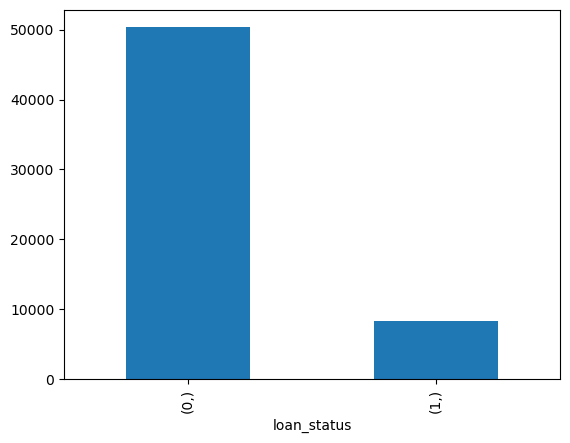

In [76]:
y.value_counts().plot(kind="bar")

### Step 4 : Preprocessing on X

In [77]:
cat = list(x.columns[x.dtypes == "object"])
con = list(x.columns[x.dtypes != "object"])

In [78]:
cat

['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file']

In [79]:
con

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

In [80]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [81]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)

In [82]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore",sparse_output=False)
)

In [83]:
pre = ColumnTransformer(
    [
        ("num",num_pipe,con),
        ("cat",cat_pipe,cat)

    ]
).set_output(transform="pandas")

In [84]:
x_pre = pre.fit_transform(x)
x_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,1.566200,-0.765768,-1.187200,-0.578306,0.267616,0.117378,2.031798,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.920057,-0.212128,0.328047,-0.937775,0.880532,-0.973242,-0.946489,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.240196,-0.929223,0.833130,-0.578306,-0.585854,0.553626,1.039036,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.405947,0.156966,2.348377,0.500101,0.142396,0.117378,-0.201917,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.920057,-0.106673,-0.682117,-0.578306,-1.238314,-0.646056,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,1.068949,1.475156,0.075506,2.836651,1.737297,0.553626,1.039036,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
58641,0.074446,-0.929223,-1.187200,0.140632,0.676227,2.080493,0.542655,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
58642,-0.754307,-0.528494,0.580588,-0.434518,1.753773,-0.100746,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
58643,-0.920057,-0.897587,-0.682117,-0.758041,-0.585854,0.117378,-0.698298,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 5 : Train Test split

In [85]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x_pre,y,test_size=0.2,random_state=42)

In [86]:
xtrain.head()

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
14337,1.400450,-0.370311,-1.187200,-0.362625,1.045295,-0.209808,2.279989,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
17117,-0.091305,-0.549585,-0.429576,-0.758041,0.323635,-0.427932,0.790845,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
32590,-0.422806,0.156966,-1.187200,-0.218837,-0.921970,-0.536994,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
55811,1.897701,0.288785,-0.682117,1.039305,-1.363533,0.444564,1.287227,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
40120,-0.920057,-0.486311,0.075506,-0.937775,-0.994465,-0.755118,-0.946489,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [87]:
ytest.head()

,loan_status
4657,0
56440,0
42117,1
10849,0
39395,0


### Step 6 - Algoritham evaluation
KNN and SVM are suitable for smaller datasets so I can skip KNN and SVM here

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import xgboost as xgb

In [89]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()
]

In [90]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [91]:
def evaluate_single_model(model,xtrain,ytrain,xtest,ytest,cv = 5):
    # Fit the model
    model.fit(xtrain,ytrain)
    # Predict the results for train and test
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)

    # Evaluate the metrics on train and test 
    f1_train = f1_score(ytrain,ypred_train,average= "macro")
    f1_test = f1_score(ytest,ypred_test,average="macro")

    # Cross validate results
    scores = cross_val_score(model,xtrain,ytrain,cv= cv,scoring = "f1_macro")
    f1_cv = scores.mean()

    e = {
        "Model Name" : model.__class__.__name__,
        "Model" : model,
        "F1 Train" : f1_train,
        "F1_Test" : f1_test,
        "F1 CV" : f1_cv
    }

    print(e)
    return e

In [92]:
def evaluate_and_compare(models,xtrain,ytrain,xtest,ytest,cv = 5):
    # Initialize results in blank list
    results = []

    # Apply for loop on models
    for model in models:
        r = evaluate_single_model(model,xtrain,ytrain,xtest,ytest,cv = 5)
        results.append(r)

    # Convert results to dataframe
    df = pd.DataFrame(results)
    s = df.sort_values(by = "F1 CV", ascending=False).reset_index(drop = True).round(4)
    return s

In [93]:
models

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 GradientBoostingClassifier(),
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...)]

In [94]:
comparison = evaluate_and_compare(models,xtrain,ytrain,xtest,ytest)
comparison

{'Model Name': 'LogisticRegression', 'Model': LogisticRegression(), 'F1 Train': 0.7938746788190654, 'F1_Test': 0.7877082014948069, 'F1 CV': 0.7930121250427976}
{'Model Name': 'DecisionTreeClassifier', 'Model': DecisionTreeClassifier(), 'F1 Train': 1.0, 'F1_Test': 0.826060364995161, 'F1 CV': 0.8272428723466113}
{'Model Name': 'RandomForestClassifier', 'Model': RandomForestClassifier(), 'F1 Train': 0.9998695320952617, 'F1_Test': 0.8919037247903242, 'F1 CV': 0.8876260555138069}
{'Model Name': 'GradientBoostingClassifier', 'Model': GradientBoostingClassifier(), 'F1 Train': 0.8886926872937604, 'F1_Test': 0.8882977547836053, 'F1 CV': 0.8853074688021471}
{'Model Name': 'XGBClassifier', 'Model': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None,

,Model Name,Model,F1 Train,F1_Test,F1 CV
0,XGBClassifier,"XGBClassifier(base_score=None, booster=None, c...",0.9232,0.8938,0.8893
1,RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...",0.9999,0.8919,0.8876
2,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,0.8887,0.8883,0.8853
3,DecisionTreeClassifier,DecisionTreeClassifier(),1.0000,0.8261,0.8272
4,LogisticRegression,LogisticRegression(),0.7939,0.7877,0.7930


### XGBoost classification is having best result with f1 score of 0.8893

In [30]:
comparison.head(1)

,Model Name,F1 Train,F1_Test,F1 CV
0,XGBClassifier,0.9232,0.8938,0.8893


In [42]:
best_model = comparison.head(1)["Model"][0]
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [45]:
imp = pd.Series(best_model.feature_importances_,index =xtrain.columns)
imp

num__person_age                        0.007744
num__person_income                     0.021628
num__person_emp_length                 0.014912
num__loan_amnt                         0.006981
num__loan_int_rate                     0.035133
num__loan_percent_income               0.093132
num__cb_person_cred_hist_length        0.005539
cat__person_home_ownership_MORTGAGE    0.011049
cat__person_home_ownership_OTHER       0.004517
cat__person_home_ownership_OWN         0.035051
cat__person_home_ownership_RENT        0.173842
cat__loan_intent_DEBTCONSOLIDATION     0.056385
cat__loan_intent_EDUCATION             0.005733
cat__loan_intent_HOMEIMPROVEMENT       0.045623
cat__loan_intent_MEDICAL               0.051429
cat__loan_intent_PERSONAL              0.007473
cat__loan_intent_VENTURE               0.017481
cat__loan_grade_A                      0.005053
cat__loan_grade_B                      0.006632
cat__loan_grade_C                      0.038221
cat__loan_grade_D                      0

In [46]:
s = imp.sort_values(ascending=False)
s

cat__loan_grade_D                      0.325756
cat__person_home_ownership_RENT        0.173842
num__loan_percent_income               0.093132
cat__loan_intent_DEBTCONSOLIDATION     0.056385
cat__loan_intent_MEDICAL               0.051429
cat__loan_intent_HOMEIMPROVEMENT       0.045623
cat__loan_grade_C                      0.038221
num__loan_int_rate                     0.035133
cat__person_home_ownership_OWN         0.035051
num__person_income                     0.021628
cat__loan_grade_E                      0.020326
cat__loan_intent_VENTURE               0.017481
num__person_emp_length                 0.014912
cat__person_home_ownership_MORTGAGE    0.011049
num__person_age                        0.007744
cat__loan_intent_PERSONAL              0.007473
num__loan_amnt                         0.006981
cat__loan_grade_B                      0.006632
cat__loan_intent_EDUCATION             0.005733
num__cb_person_cred_hist_length        0.005539
cat__cb_person_default_on_file_N       0

<Axes: >

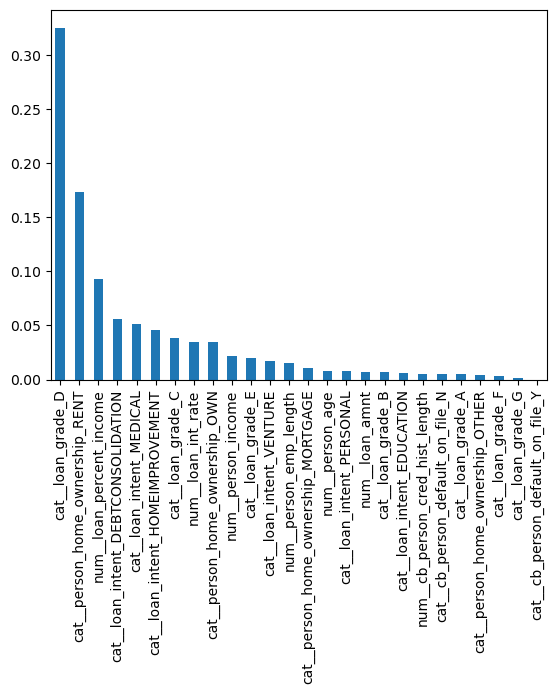

In [47]:
s.plot(kind = "bar")

### Step 7 : Evaluate best model

In [48]:
best_model.score(xtrain,ytrain)

0.9651291670219115

In [49]:
best_model.score(xtest,ytest)

0.9524256117316054

### Step 8 : Out of Sample Prediction

In [50]:
xnew = pd.read_csv("test_loan.csv")
xnew.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,58645,23,69000,RENT,3.0,HOMEIMPROVEMENT,F,25000,15.76,0.36,N,2
1,58646,26,96000,MORTGAGE,6.0,PERSONAL,C,10000,12.68,0.10,Y,4
2,58647,26,30000,RENT,5.0,VENTURE,E,4000,17.19,0.13,Y,2
3,58648,33,50000,RENT,4.0,DEBTCONSOLIDATION,A,7000,8.90,0.14,N,7
4,58649,26,102000,MORTGAGE,8.0,HOMEIMPROVEMENT,D,15000,16.32,0.15,Y,4


In [51]:
xnew.shape

(39098, 12)

### Predict the results with probability

In [54]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__person_age,num__person_income,num__person_emp_length,num__loan_amnt,num__loan_int_rate,num__loan_percent_income,num__cb_person_cred_hist_length,cat__person_home_ownership_MORTGAGE,cat__person_home_ownership_OTHER,cat__person_home_ownership_OWN,...,cat__loan_intent_VENTURE,cat__loan_grade_A,cat__loan_grade_B,cat__loan_grade_C,cat__loan_grade_D,cat__loan_grade_E,cat__loan_grade_F,cat__loan_grade_G,cat__cb_person_default_on_file_N,cat__cb_person_default_on_file_Y
0,-0.754307,0.130602,-0.429576,2.836651,1.674687,2.189555,-0.946489,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,-0.257055,0.842425,0.328047,0.140632,0.659750,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.257055,-0.897587,0.075506,-0.937775,2.145908,-0.318870,-0.946489,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.903198,-0.370311,-0.177035,-0.398572,-0.585854,-0.209808,0.294464,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,-0.257055,1.000608,0.833130,1.039305,1.859221,-0.100746,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39093,-0.920057,-0.865950,-0.682117,-1.117510,-0.101452,-0.646056,-0.450108,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39094,-0.920057,-0.423038,0.328047,-0.398572,-1.531591,-0.100746,-0.698298,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39095,3.886707,-0.106673,-1.187200,1.039305,-1.043894,0.989873,4.761895,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39096,-0.920057,-0.739404,-0.177035,0.859570,1.628554,2.516741,-0.450108,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [56]:
preds = best_model.predict(xnew_pre)
preds[0:5]

array([1, 0, 1, 0, 0])

In [58]:
probs = best_model.predict_proba(xnew_pre)[:,1]
probs[0:5]

array([0.9935782 , 0.01971769, 0.800897  , 0.00891485, 0.02317074],
      dtype=float32)

In [60]:
results = xnew[["id"]]
results["loan_pred"] = preds
results["loan_probability"] = probs

In [62]:
results = results.round(4)
results

,id,loan_pred,loan_probability
0,58645,1,0.9936
1,58646,0,0.0197
2,58647,1,0.8009
3,58648,0,0.0089
4,58649,0,0.0232
...,...,...,...
39093,97738,0,0.0324
39094,97739,0,0.0028
39095,97740,0,0.0070
39096,97741,0,0.0769


In [65]:
results["loan_pred"].value_counts()

0    34709
1     4389
Name: loan_pred, dtype: int64

<Axes: >

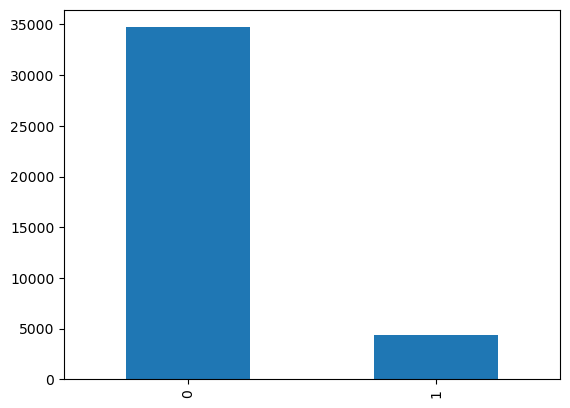

In [64]:
results["loan_pred"].value_counts().plot(kind="bar")

In [66]:
results.to_csv("XGBResults.csv",index = False)

### Saving the model with joblib

In [67]:
%pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [68]:
import joblib
joblib.dump(best_model,filename="LoanXGB.joblib")

['LoanXGB.joblib']

### Loading model using joblib

In [69]:
m = joblib.load(filename="LoanXGB.joblib")

In [70]:
m

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)